# Kurs 5

Wir setzen mit den bereits bekannten DataFrames ```grades_2020``` und ```grades_2021``` fort:

In [3]:
using DataFrames, Pipe

function grades_2020()
    name = ["Sally", "Bob", "Alice", "Hank"]
    grade_2020 = [1, 5, 8.5, 4]
    DataFrame(; name, grade_2020)
end

function grades_2021() # grades_2020() haben wir schon
    name = ["Kevin", "Sally", "Hank"]
    grade_2021 = [8, 7, 5.5]
    DataFrame(; name, grade_2021)
end

grades_2021 (generic function with 1 method)

### Variablen transformieren und anpassen 

In diesem Beispiel wird der Datensatz ```grades_2020``` via ```plus_1``` transformiert:

In [4]:
plus_1(grades) = grades .+ 1
transform(grades_2020(), :grade_2020 => plus_1)

Row,name,grade_2020,grade_2020_plus_1
,String,Float64,Float64
1,Sally,1.0,2.0
2,Bob,5.0,6.0
3,Alice,8.5,9.5
4,Hank,4.0,5.0


Wird keine target location übergeben, wird automatisch eine neue Spalte erstellt. Falls die alte Spalte überschrieben werden soll, kann man diese als target location auswählen: 

In [5]:
transform(grades_2020(), :grade_2020 => plus_1 => :grade_2020)

Row,name,grade_2020
,String,Float64
1,Sally,2.0
2,Bob,6.0
3,Alice,9.5
4,Hank,5.0


Alternativ kann man das Argument ```renamecols = false``` setzen:

In [6]:
transform(grades_2020(), :grade_2020 =>  plus_1; renamecols = false)

Row,name,grade_2020
,String,Float64
1,Sally,2.0
2,Bob,6.0
3,Alice,9.5
4,Hank,5.0


#### Groupby and Combine

Mit Hilfe dieser beider Befehle können Dataframes aufgeteilt und im Anschluss auch wieder zusammengeführt werden.


In [7]:
function all_grades()
    df1 = grades_2020()
    df1 = select(df1, :name, :grade_2020 => :grade)
    df2 = grades_2021()
    df2 = select(df2, :name, :grade_2021 => :grade)
    return vcat(df1, df2)
end
all_grades()

Row,name,grade
,String,Float64
1,Sally,1.0
2,Bob,5.0
3,Alice,8.5
4,Hank,4.0
5,Kevin,8.0
6,Sally,7.0
7,Hank,5.5


Die Idee ist nun den obigen DataFrame aufzuteilen und für jeden Schüler den Mittelwert seiner Note zu berechen und anschließend einen DataFrame mit den Durchschnittsnoten auszugeben. 



In [8]:
grouped_grades = groupby(all_grades(), :name)

Row,name,grade
,String,Float64
1,Sally,1.0
2,Sally,7.0
Row,name,grade
,String,Float64
1,Kevin,8.0


In [9]:
using Statistics
combine(grouped_grades, :grade => mean)

Row,name,grade_mean
,String,Float64
1,Sally,4.0
2,Bob,5.0
3,Alice,8.5
4,Hank,4.75
5,Kevin,8.0


### Fehlende Werte

In Julia gibt es einen Datentyp ```missing``` für fehlende Werte, der sich bei Rechenoperationen oder Vergleichsoperationen von anderen Datentypen unterscheidet:

In [10]:
missing * 2

missing

In [11]:
missing == true

missing

Bei einer realen Datenanalyse kommt es aber sehr häufig vor, dass Datenpunkte fehlen, daher müssen wir uns überlegen, wie wir damit sinnvoll umgehen. Betrachte zur Demonstration folgenden DataFrame:

In [12]:
df_missing = DataFrame(
    name = [missing, "Sally", "Alice", "Hank"],
    age = [17, missing, 20, 19],
    grade_2020 = [5.0, 1.0, missing, 4.0],
)

Row,name,age,grade_2020
,String?,Int64?,Float64?
1,missing,17,5.0
2,Sally,missing,1.0
3,Alice,20,missing
4,Hank,19,4.0


Wichtig ist zum Beispiel die Funktion ```dropmissing```. Diese entfernt jede Reihe, in der ein ```missing``` value enthalten ist:

In [13]:
dropmissing(df_missing)

Row,name,age,grade_2020
,String,Int64,Float64
1,Hank,19,4.0


Es können auch nur in bestimmenten Spalten alle ```missing``` werte entfernt werden.  

In [14]:
dropmissing(df_missing, [:name, :age])

Row,name,age,grade_2020
,String,Int64,Float64?
1,Alice,20,missing
2,Hank,19,4.0


```ismissing``` ist eine Funktion, die überprüft, ob der zugrundeliegende Datentyp dem Typ ```Missing``` entspricht und gibt dann dementsprechen ein ```true``` oder ```false``` zurück. Damit können wir zum Beispiel anstelle der Funktion ```dropmissing``` wieder unsere altbekannte Funktion ```filter``` nutzen:

In [15]:
filter(:name => !ismissing, df_missing)

Row,name,age,grade_2020
,String?,Int64?,Float64?
1,Sally,missing,1.0
2,Alice,20,missing
3,Hank,19,4.0


In [16]:
dropmissing(df_missing, [:name])

Row,name,age,grade_2020
,String,Int64?,Float64?
1,Sally,missing,1.0
2,Alice,20,missing
3,Hank,19,4.0


Wenn wir hier aber wieder nach zwei Spalten filtern wollen, dann wird es relativ hässlich (aber bitte trotzdem einmal durchdenken!):

In [17]:
filter([:name, :age] => (x, y) -> all((!).(ismissing.([x, y]))), df_missing)

Row,name,age,grade_2020
,String?,Int64?,Float64?
1,Alice,20,missing
2,Hank,19,4.0


Um fehlende Werte zu überspringen um zum Beispiel die Funktion ```mean``` auf die Spalte ```age``` anwenden zu können, gibt es die Funktion ```skipmissing```. 


In [18]:
mean_age = mean(skipmissing(df_missing.age))

18.666666666666668

Oft will man für fehlende Werte durch andere Werte ersetzen, mit denen man besser arbeiten kann. Dies kann etwa mithilfe der Funktion ```coalesce``` erreicht werden: 

In [19]:
coalesce.([missing, "some value", missing], "zero")

3-element Vector{String}:
 "zero"
 "some value"
 "zero"

Angenommen, wir wollen nun die Werte in der Spalte ```age``` einfach durch das Durchschnittsalter aller anderer Schüler approximieren:

In [20]:
df_missing

Row,name,age,grade_2020
,String?,Int64?,Float64?
1,missing,17,5.0
2,Sally,missing,1.0
3,Alice,20,missing
4,Hank,19,4.0


In [21]:
transform(df_missing, :age => ByRow(x -> coalesce(x, mean_age)); renamecols = false)

Row,name,age,grade_2020
,String?,Real,Float64?
1,missing,17,5.0
2,Sally,18.6667,1.0
3,Alice,20,missing
4,Hank,19,4.0


## Plots

### Einführung

Es gibt viele verschiedene plotting libraries in Julia; wir geben eine Einführung in die Standardbibliothek [Plots.jl](https://docs.juliaplots.org/stable/). Alternativ empfehlen wir für fortgeschrittene Anwender [Makie.jl](https://docs.makie.org/stable/) und die Einführung [hier](https://juliadatascience.io/DataVisualizationMakie) (hat ein etwas umfasserendes Ökosystem) oder [Gadfly](http://gadflyjl.org/stable/) (ist sehr ähnlich zu ggplot2, sprich ist eine an The Grammar of Graphics orientierte Bibliothek, und sieht per default ziemlich gut aus).

Ein Cheatsheet findet man [hier](https://github.com/sswatson/cheatsheets/blob/f0f94a7c9f4442c6e4f852dfad19246cc916e205/plotsjl-cheatsheet.pdf).

In [22]:
# Die Ausgabe dieses Befehls ist beim ersten Ausführen länger
using Pkg; Pkg.add("Plots")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Wir starten mit dem einfachen Sinus-plot und erweitern diesen iterativ um verschiedene manuell konfigurierbare Attribute.

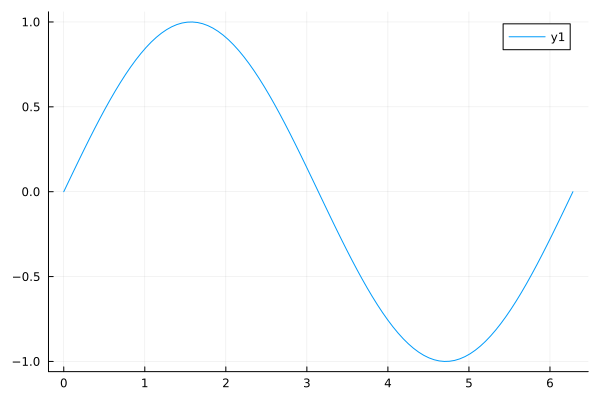

In [23]:
using Plots
x = range(0, 2*pi, length=100)
y = sin.(x)
plot(x, y)

Hier haben wir jetzt einen (völlig unspektakulären) Standardplot und man kann nun anfangen, diesem Attribute hinzuzufügen, wie zum Bespiel die Beschriftung der Achsen sowie der Kurve selbst: 

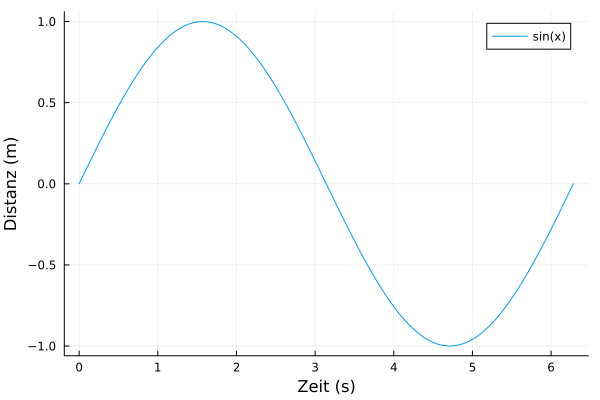

In [24]:
x = range(0, 2*pi, length=100)
y = sin.(x)
plot(x, y,
    xlabel = "Zeit (s)",
    ylabel = "Distanz (m)",
    label = "sin(x)"
)

Mit Hilfe von ```xticks``` bzw. ```yticks``` kann ein Tupel übergeben werden, welches im ersten Argument einen Array für die Achsenabschnitte und im zweiten Argument einen Array für deren Beschriftung enthält:    

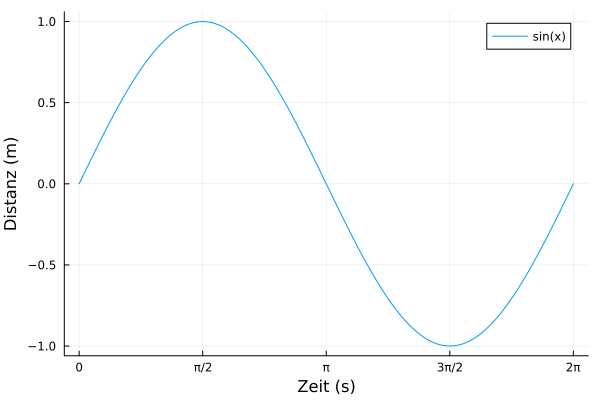

In [25]:
plot(x, y,
    xlabel = "Zeit (s)",
    ylabel = "Distanz (m)",
    label = "sin(x)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "π/2", "π", "3π/2", "2π"])
)

Um einen zweiten Plot zu dem bereits bestehenden hinzuzufügen, gibt es verschiedene Möglichkeiten: Falls der Plot im gleichen Fenster sein soll, kann man diesen durch ```plot!``` ganz einfach in dieselbe Grafik einzeichnen: 

In [26]:
plot(x, y1,
    xlabel = "Zeit (s)",
    ylabel = "Distanz (m)",
    label = "sin(x)",
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "π/2", "π", "3π/2", "2π"])
)

UndefVarError: UndefVarError: `y1` not defined

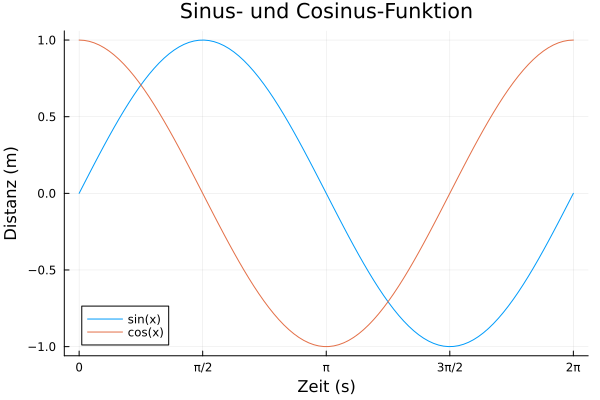

In [27]:
y1 = sin.(x)
y2 = cos.(x)
plot(x, y1,
    xlabel = "Zeit (s)",
    ylabel = "Distanz (m)",
    label = "sin(x)",
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "π/2", "π", "3π/2", "2π"])
)
plot!(x, y2,
    label = "cos(x)",
    title = "Sinus- und Cosinus-Funktion"
)

Falls man zwei verschiedene Fenster für die jeweiligen Plots haben will, kann man zwei seperate plots erstellen und diese mit einem dritten Plotbefehl sowie einer Positionsangabe neben- oder untereinander plotten:

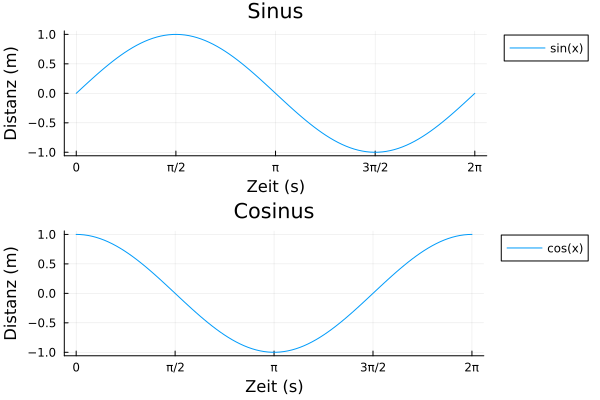

In [28]:
y1 = sin.(x)
y2 = cos.(x)

p1 = plot(x, y1,
    xlabel = "Zeit (s)",
    ylabel = "Distanz (m)",
    label = "sin(x)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "π/2", "π", "3π/2", "2π"]),
    title = "Sinus"
)
p2 = plot(x, y2,
    xlabel = "Zeit (s)",
    ylabel = "Distanz (m)",
    label = "cos(x)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "π/2", "π", "3π/2", "2π"]),
    title = "Cosinus"
)

plot(p1, p2, layout=(2, 1),legend=:outertopright)

### Scatterplots

Ein weiteres Bespiel aus Plots.jl sind scatter plots. Hierfür laden wir uns zunächst einen klassischen R-Datensatz in Julia und stellen diesen dann Stück für Stück grafisch dar.  


In [29]:
# Die Ausgabe dieses Befehls ist beim ersten Ausführen länger
Pkg.add("RDatasets");

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [30]:
using DataFrames
using RDatasets

# ein Klassiker
iris = dataset("datasets", "iris")
first(iris,10)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Wir erstellen einen ersten Scatterplot über die beiden Spalten ```PetalLength``` und ```SepalWidth```:

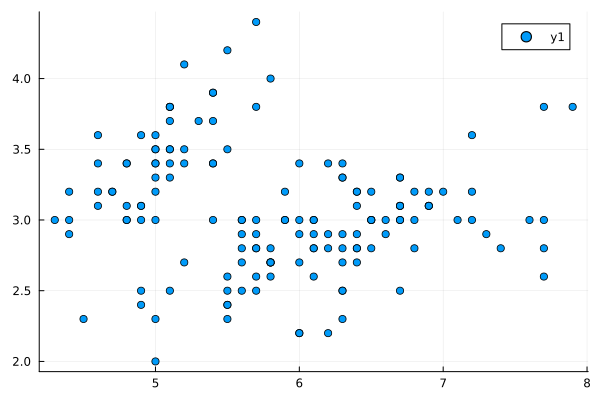

In [31]:
scatter(iris.SepalLength, iris.SepalWidth)

Alternativ könnten wir auch den normalen `plot`-Befehl in Verbindung mit `seriestype = :scatter` nutzen. Auch hier könnten analog zum obigen Bespiel erstmal die Achsen beschriftet werden. Stattdessen sollen hier aber die Punkte anhand eines gewissen Attributs gruppiert werden. Hierfür nehmen wir uns die Spalte ```Species```. 

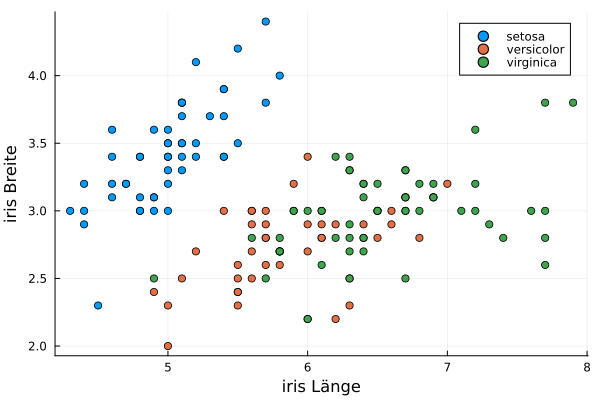

In [32]:
scatter(iris.SepalLength, iris.SepalWidth, 
    xlabel = "iris Länge",
    ylabel = "iris Breite",
    group = iris.Species
)

Die Farbe und Größe der Datenpunkte, orientiert anhand einer bestimmten Kategorie des Datensatzes, können ebenfalls leicht verändert/hinzugefügt werden, um weitere Attribute des Datensatzes in den Plot zu integrieren. 

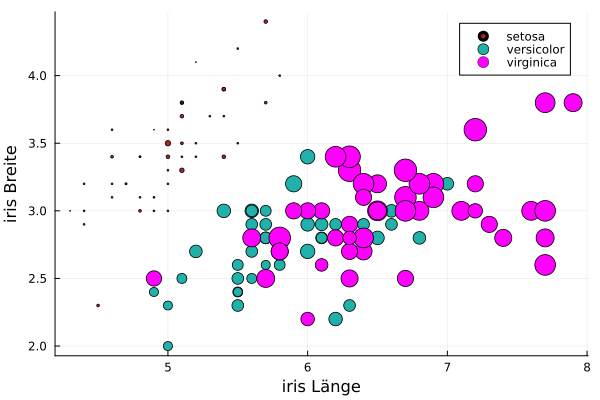

In [33]:
scatter(iris.SepalLength, iris.SepalWidth, 
    xlabel = "iris Länge",
    ylabel = "iris Breite",
    group = iris.Species, 
    markercolor = [:firebrick :lightseagreen :magenta],
    markersize = iris.PetalWidth*5 
)

Auch hier können noch viele weitere Attribute ergänzt werden, diese findet man in [diesem](https://docs.juliaplots.org/latest/attributes/) und den folgenden Abschnitten der Dokumentation.

Als letztes Beispiel aus Plots.jl ist hier noch ein Histogramm bei dem einige andere Attribute des Histogramms, wie Farbe der Plots oder *bins*, angepasst sind. Zudem werden hier auch zwei unterschiedlich plot-Typen kombiniert: 

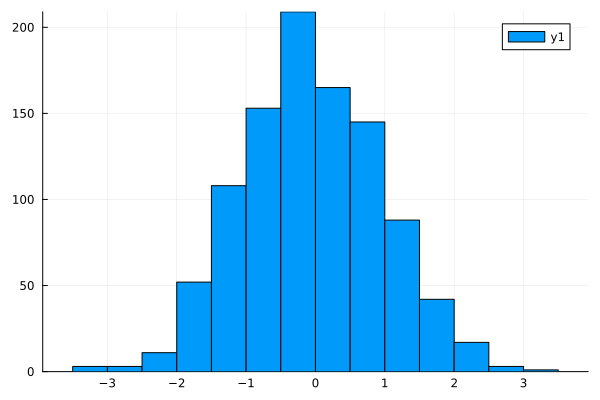

In [34]:
x = randn(10^3)  
histogram(x)

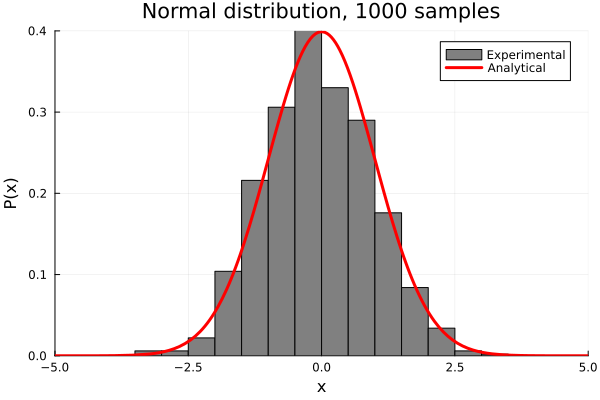

In [35]:
p(x) = 1/sqrt(2pi) * exp(-x^2/2)
b_range = range(-5, 5, length=21)

histogram(x, label="Experimental", bins=b_range, normalize=:pdf, color=:gray)
plot!(p, label="Analytical", lw=3, color=:red)
xlims!(-5, 5)
ylims!(0, 0.4)
title!("Normal distribution, 1000 samples")
xlabel!("x")
ylabel!("P(x)")